In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.patches as patches
import games



# Animation of Groups Sizes/Ratios over generations

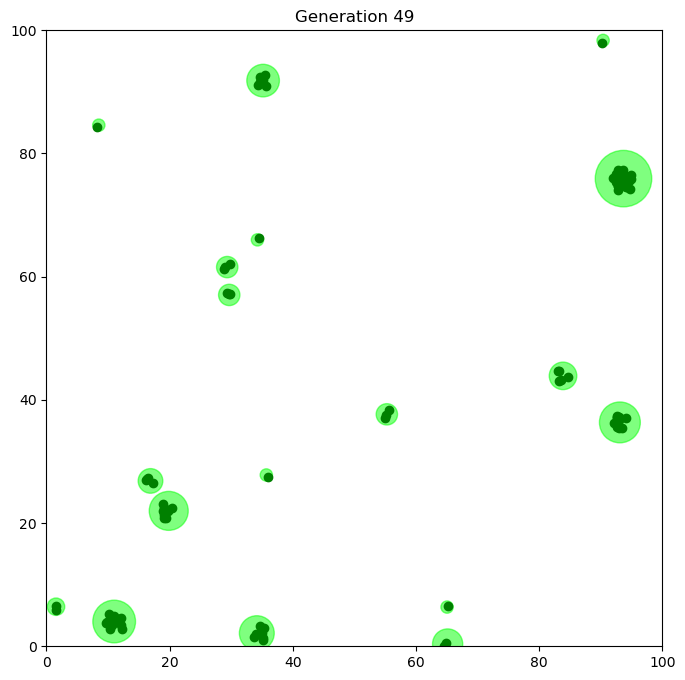

In [28]:
population = 100
num_groups = 20
num_generations = 50
cost_benefit_ratio = 0.1
cooperation_threshold = 0.1
group_split_size = 20
split_mode = 'smallest'

np.random.seed(50)


results = games.group_split_game(population, num_groups, num_generations, cost_benefit_ratio, cooperation_threshold, group_split_size, split_mode)

recorded_group_population, recorded_group_cooperators, recorded_group_rewards, \
recorded_avg_group_population, recorded_population_cooperators, recorded_population_rewards, \
recorded_tournament_strategy_changes, recorded_group_split_strategy_changes = results


#generates random non-overlapping circle positions
def generate_positions(num_groups, circle_radii):
    positions = np.random.rand(num_groups, 2) * 100
    for i in range(num_groups):
        for j in range(i):
            while np.linalg.norm(positions[i] - positions[j]) < (circle_radii[i] + circle_radii[j]):
                positions[i] = np.random.rand(2) * 100
    return positions

fixed_positions = generate_positions(num_groups, np.sqrt([max(recorded_group_population[g]) for g in range(num_groups)]))

def update_plot(frame):
    plt.clf()
    
    # Group sizes and cooperators for the current frame
    group_sizes = [recorded_group_population[g][frame] for g in range(num_groups)]
    group_cooperators = [recorded_group_cooperators[g][frame] for g in range(num_groups)]

    # Filter out empty groups
    non_empty_indices = [i for i, size in enumerate(group_sizes) if size > 0]
    group_sizes = [group_sizes[i] for i in non_empty_indices]
    group_cooperators = [group_cooperators[i] for i in non_empty_indices]

    radii = np.sqrt(group_sizes)
    positions = [fixed_positions[i] for i in non_empty_indices]

    # Draw circles and dots for cooperators and defectors
    for i in range(len(group_sizes)):
        size = group_sizes[i]
        cooperators = group_cooperators[i]
        defectors = size - cooperators

        color_ratio = cooperators / size
        circle_color = [1 - color_ratio, color_ratio, 0.0]  # Red to green gradient

        circle = patches.Circle(positions[i], radius=radii[i], color=circle_color, alpha=0.5)
        plt.gca().add_patch(circle)

        # Add dots for cooperators and defectors inside the circle
        for _ in range(int(cooperators)):
            cooperator_pos = positions[i] + np.random.rand(2) * radii[i] * 0.8 - radii[i] * 0.4
            plt.plot(cooperator_pos[0], cooperator_pos[1], 'go') 

        for _ in range(int(defectors)):
            defector_pos = positions[i] + np.random.rand(2) * radii[i] * 0.8 - radii[i] * 0.4
            plt.plot(defector_pos[0], defector_pos[1], 'ro')

    plt.xlim(0, 100)
    plt.ylim(0, 100)
    plt.title(f"Generation {frame}")
    plt.gca().set_aspect('equal')

fig = plt.figure(figsize=(8, 8))

ani = animation.FuncAnimation(fig, update_plot, frames=num_generations, repeat=False, interval=500)
ani.save('/figures/group_split_simulation.gif', writer='pillow')

plt.show()


# Figure of Group Sizes/Ratios over generations

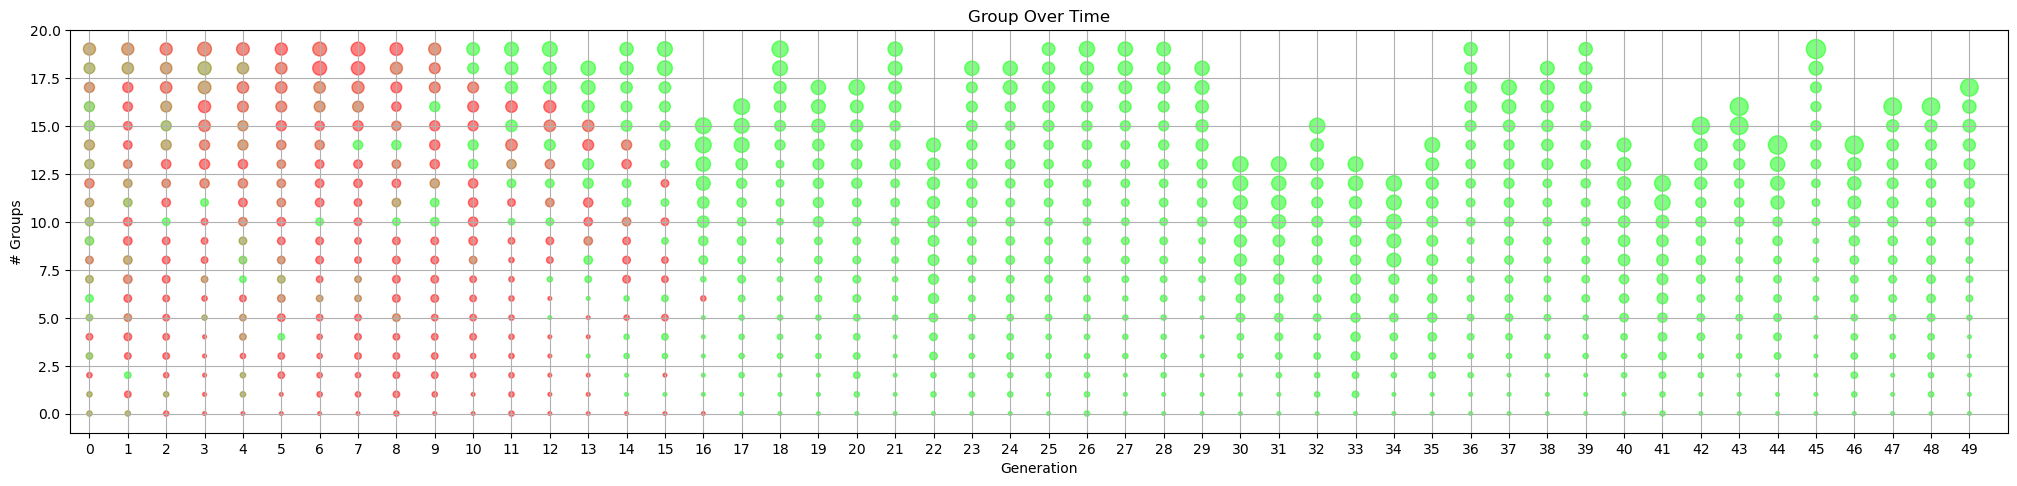

In [27]:
population = 100
num_groups = 20
num_generations = 50
cost_benefit_ratio = 0.1
cooperation_threshold = 0.1
group_split_size = 20
split_mode = 'smallest'

np.random.seed(50)


results = games.group_split_game(population, num_groups, num_generations, cost_benefit_ratio, cooperation_threshold, group_split_size, split_mode)

recorded_group_population, recorded_group_cooperators, recorded_group_rewards, \
recorded_avg_group_population, recorded_population_cooperators, recorded_population_rewards, \
recorded_tournament_strategy_changes, recorded_group_split_strategy_changes = results

group_data = []
for gen in range(num_generations):
    group_sizes = [recorded_group_population[g][gen] for g in range(num_groups)]
    group_cooperators = [recorded_group_cooperators[g][gen] for g in range(num_groups)]
    
    # Filter out empty groups
    non_empty_indices = [i for i, size in enumerate(group_sizes) if size > 0]
    sizes = [group_sizes[i] for i in non_empty_indices]
    cooperators = [group_cooperators[i] for i in non_empty_indices]
    

    group_data.append(list(zip(sizes, cooperators)))

num_cols = len(group_data)
fig, ax = plt.subplots(figsize=(25, 15))

for col_idx, groups in enumerate(group_data):
    # Sort groups by size
    groups.sort(key=lambda x: x[0])
    

    x_pos = col_idx * 2  
    for row_idx, (size, cooperators) in enumerate(groups):
        radius = np.sqrt(size) * 0.1  # Scale the radius
        color_ratio = cooperators / size if size > 0 else 0
        circle_color = [1 - color_ratio, color_ratio, 0.0]  # Red to green gradient
        circle = patches.Circle((x_pos, row_idx), radius=radius, color=circle_color, alpha=0.5)
        ax.add_patch(circle)

plt.xlim(-1, num_cols * 2)
plt.ylim(-1, num_groups)
plt.title('Group Over Time')
plt.xlabel('Generation')
plt.ylabel('# Groups')
plt.xticks(np.arange(0, num_cols * 2, 2), [f'{i}' for i in range(num_cols)])
plt.gca().set_aspect('equal', adjustable='box')

# Display the plot
plt.grid()
plt.show()
